<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%EA%B0%95%EC%84%A4%EB%9F%89_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**1. 데이터로딩, 라이브러리 로딩**

In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 데이터 불러오기
train = pd.read_excel("/content/sample_data/train_total.xlsx")
test = pd.read_excel("/content/sample_data/test_total.xlsx")

###**2. 데이터 탐색**


In [5]:
train.head()

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,일 최심신적설(cm),연장(km)
0,2017-01-01,2017,1,전남,무안군,1,1,7,1,22,-0.3,11.6,81.0,3.946154,0.0,3.00
1,2017-01-01,2017,1,전남,무안군,1,1,7,1,22,-0.3,11.6,81.0,3.946154,0.0,17.00
2,2017-01-01,2017,1,전남,무안군,1,1,7,1,22,-0.3,11.6,81.0,3.946154,0.0,2.00
3,2017-01-01,2017,1,전남,무안군,1,1,7,1,22,-0.3,11.6,81.0,3.946154,0.0,10.65
4,2017-01-01,2017,1,전남,무안군,1,1,7,1,22,-0.3,11.6,81.0,3.946154,0.0,3.54


In [6]:
train.tail()

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,일 최심신적설(cm),연장(km)
358110,2022-12-31,2022,12,경기,성남시,1,1,6,5,127,-9.74,0.8,79.84,-1.44,0.0,2.0
358111,2022-12-31,2022,12,경기,성남시,1,1,6,5,127,-9.74,0.8,79.84,-1.44,0.0,7.0
358112,2022-12-31,2022,12,경기,성남시,1,1,6,5,127,-9.74,0.8,79.84,-1.44,0.0,8.0
358113,2022-12-31,2022,12,경기,성남시,1,1,6,5,127,-9.74,0.8,79.84,-1.44,0.0,2.0
358114,2022-12-31,2022,12,경기,성남시,1,1,6,5,127,-9.74,0.8,79.84,-1.44,0.0,2.0


In [7]:
test.head()

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,일 최심신적설(cm),연장(km)
0,2017-01-01,2017,1,전남,무안군,1,1,7,1,-0.3,11.6,81.0,3.946154,0.0,3.00
1,2017-01-01,2017,1,전남,무안군,1,1,7,1,-0.3,11.6,81.0,3.946154,0.0,17.00
2,2017-01-01,2017,1,전남,무안군,1,1,7,1,-0.3,11.6,81.0,3.946154,0.0,2.00
3,2017-01-01,2017,1,전남,무안군,1,1,7,1,-0.3,11.6,81.0,3.946154,0.0,10.65
4,2017-01-01,2017,1,전남,무안군,1,1,7,1,-0.3,11.6,81.0,3.946154,0.0,3.54


**2.1 데이터 확인**

In [8]:
print(train.shape)
print(test.shape)

(358115, 16)
(358115, 15)


In [16]:
train=train.drop(['사고발생일자'], axis=1)
test=test.drop(['사고발생일자'],axis=1)

사고발생일자
사고발생년도
사고발생월도
지역(시도)
지역(구군)
공휴일구분
주말구분
요일
주차
사고건수
평균최저기온(℃)
일교차
평균습도(%rh)
평균지면온도
일 최심신적설(cm)
연장(km)

In [23]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358115 entries, 0 to 358114
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   사고발생년도       358115 non-null  int64  
 1   사고발생월도       358115 non-null  int64  
 2   지역(시도)       358115 non-null  object 
 3   지역(구군)       358115 non-null  object 
 4   공휴일구분        358115 non-null  int64  
 5   주말구분         358115 non-null  int64  
 6   요일           358115 non-null  int64  
 7   주차           358115 non-null  int64  
 8   사고건수         358115 non-null  int64  
 9   평균최저기온(℃)    358115 non-null  float64
 10  일교차          358115 non-null  float64
 11  평균습도(%rh)    358115 non-null  float64
 12  평균지면온도       358115 non-null  float64
 13  일 최심신적설(cm)  358115 non-null  float64
 14  연장(km)       358115 non-null  float64
dtypes: float64(6), int64(7), object(2)
memory usage: 41.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358115 entries, 0 to 358114
Data columns (tot

In [17]:
X_train = train.drop(['사고건수'],axis= 1)
y_train = train['사고건수']

In [18]:
X_test=test

In [26]:
# 원핫 인코딩

X_train = pd.get_dummies(data = X_train, columns = ['지역(시도)','지역(구군)'], prefix = ['지역(시도)','지역(구군)'])
X_test = pd.get_dummies(data = X_test, columns = ['지역(시도)','지역(구군)'], prefix = ['지역(시도)','지역(구군)'])

**회귀모델**


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {} # 빈 딕셔너리

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_,pred,actual): # parameter: 모델명, 예측값, 실제값
  df = pd.DataFrame({'prediction' : pred,'actual': y_test})
  df = df.sort_values(by = 'actual').reset_index(drop = True)

  plt.figure(figsize = (12,9))
  plt.scatter(df.index,df['prediction'],marker = 'x',color = 'r')
  plt.scatter(df.index,df['actual'],alpha = 0.7,marker = 'o',color = 'black')
  plt.title(name_,fontsize = 15)
  plt.legend(['prediction','actual'],fontsize = 12)
  plt.show()

def rmse_eval(name_,pred,actual):
  global my_predictions
  global colors

  plot_predictions(name_,pred,actual)

  rmse = np.sqrt(mean_squared_error(pred,actual))
  my_predictions[name_] = rmse

  y_value = sorted(my_predictions.items(),key = lambda x: x[1],reverse = True) # 내림차순 정렬

  df = pd.DataFrame(y_value, columns = ['model','rmse'])
  print(df)

  # 상한, 하한 설정
  min_ = df['rmse'].min() - 10
  max_ = df['rmse'].max() + 10

  length = len(df)

  plt.figure(figsize = (10,length))
  ax = plt.subplot() # subplot 객체
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'],fontsize = 15)
  bars = ax.barh(np.arange(len(df)),df['rmse'])

  for i,v in enumerate(df['rmse']): # 인덱스, value
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2,i,str(round(v,3)),color = 'k',fontsize = 15,fontweight = 'bold')

  plt.title('RMSE Error',fontsize = 18)
  plt.xlim(min_,max_)

  plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

**단순선형회귀**


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred=reg.predict(X_test)
y_pred

array([ 5.33514404,  6.68373108, 33.03109741, ..., 28.25128174,
       12.53985596,  1.38014221])

In [32]:
y_test

94290       4
92827       1
223978     97
32303       1
227323    115
         ... 
356006     67
39096       8
32920      27
215233     11
32071       2
Name: 사고건수, Length: 57299, dtype: int64

In [33]:
model=pd.DataFrame(y_pred)
model

,0
0,5.335144
1,6.683731
2,33.031097
3,1.349930
4,93.395569
...,...
57294,46.225754
57295,3.956665
57296,28.251282
57297,12.539856


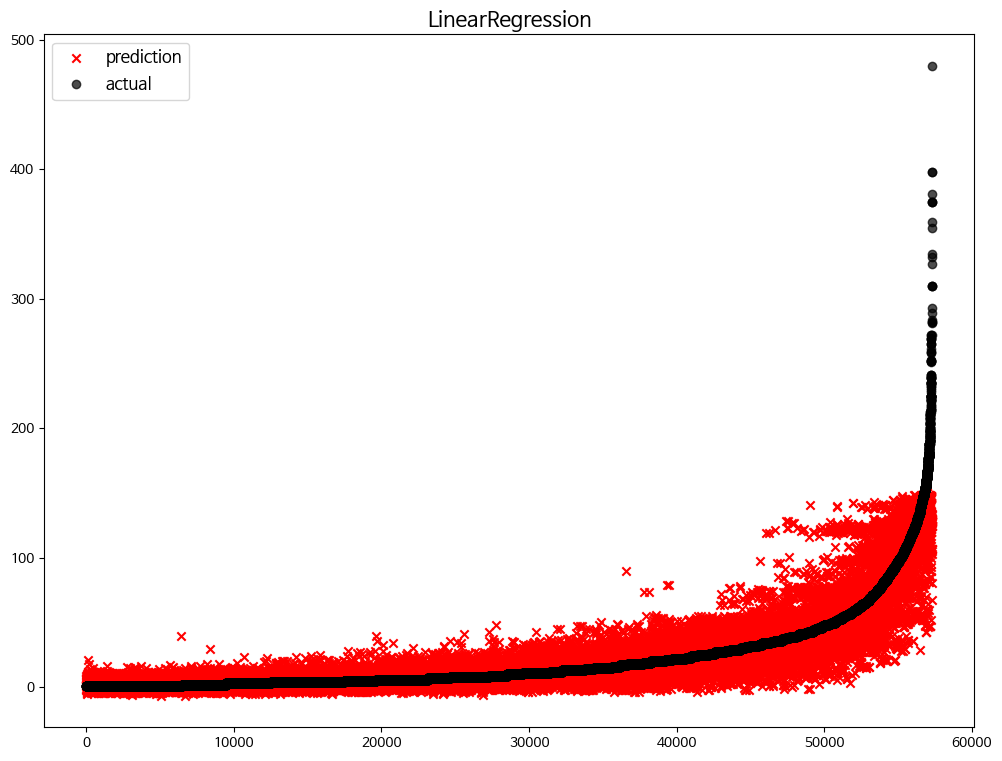

              model       rmse
0  LinearRegression  12.661563


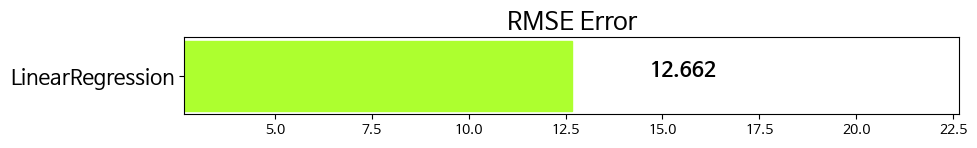

In [34]:
rmse_eval('LinearRegression',y_pred,y_test)

**규제 선형회귀**
- 릿지회귀

In [35]:
from sklearn.linear_model import Ridge

In [36]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001]

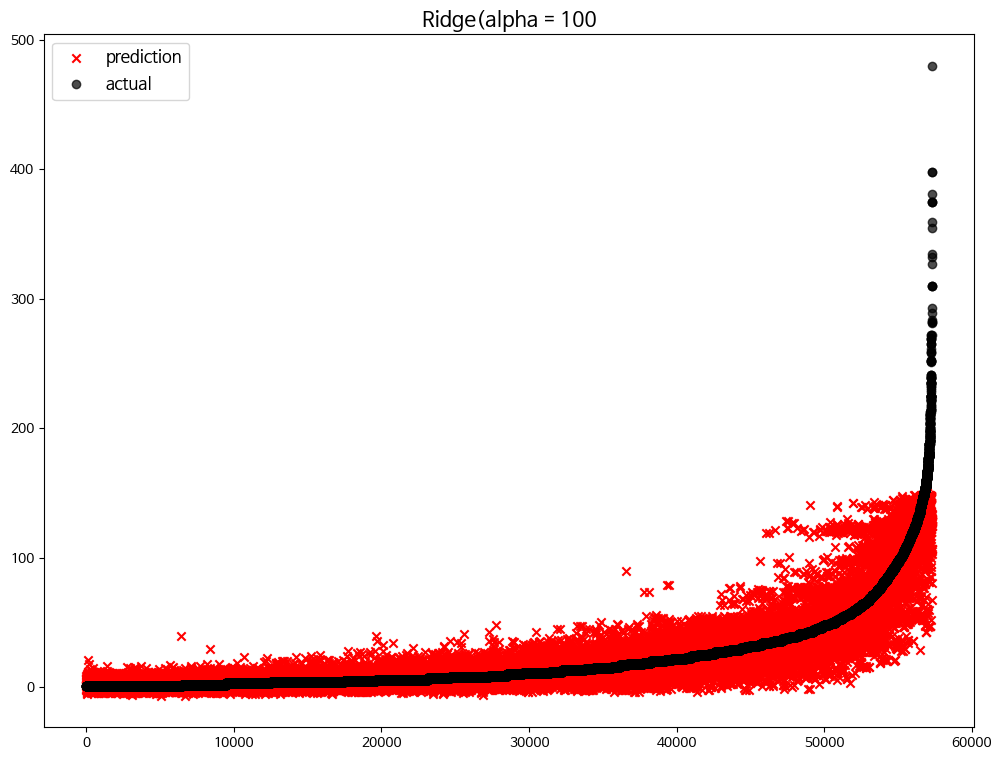

               model       rmse
0   LinearRegression  12.661563
1  Ridge(alpha = 100  12.661563


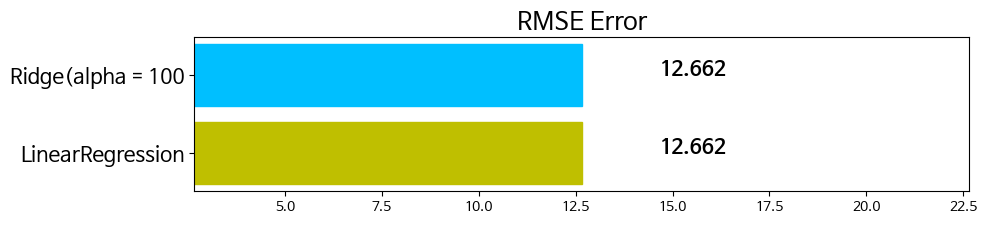

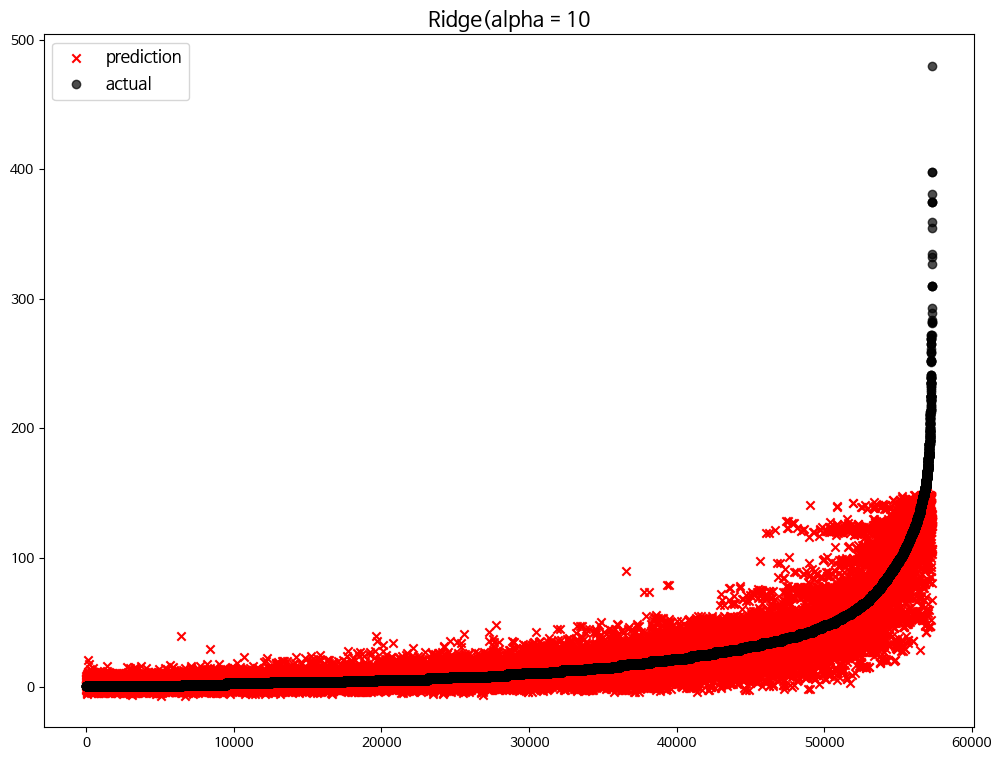

               model       rmse
0   LinearRegression  12.661563
1  Ridge(alpha = 100  12.661563
2   Ridge(alpha = 10  12.661563


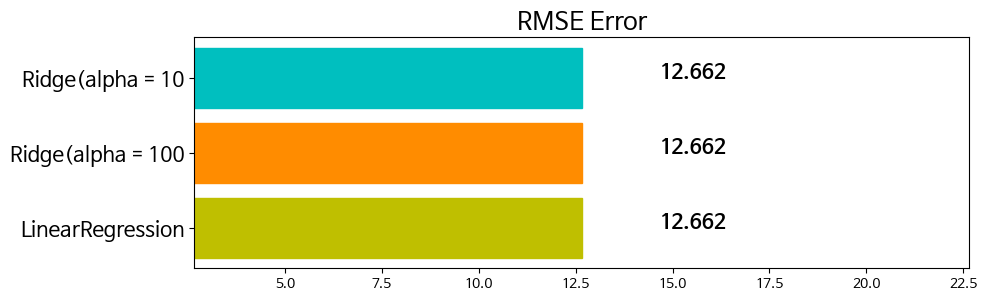

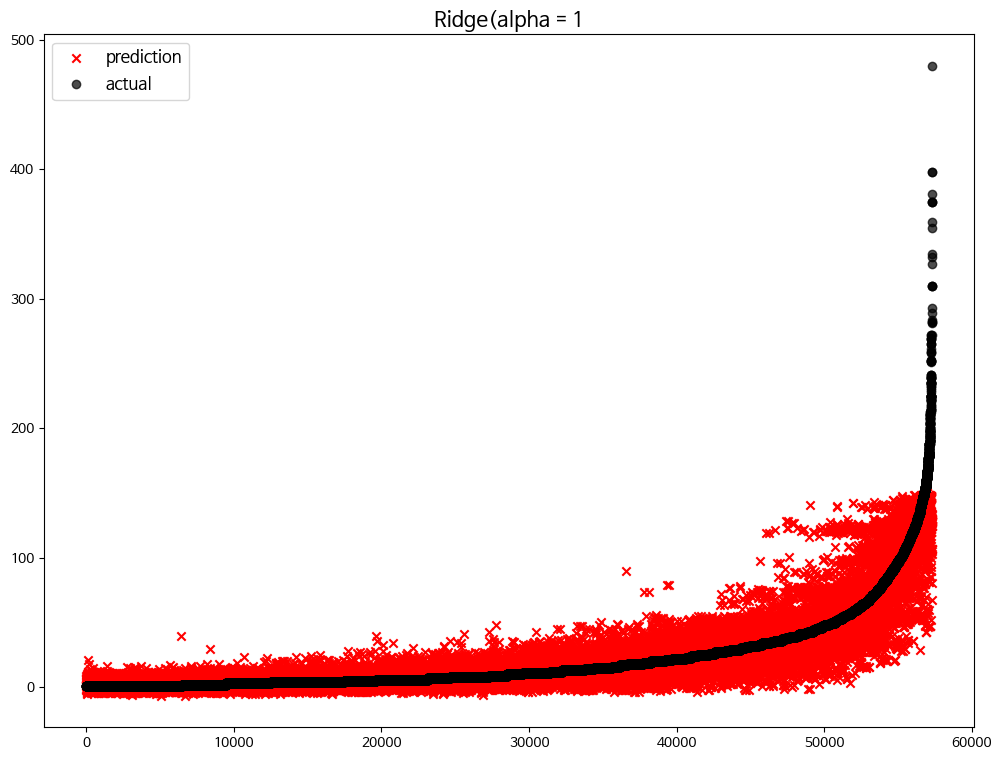

               model       rmse
0   LinearRegression  12.661563
1  Ridge(alpha = 100  12.661563
2   Ridge(alpha = 10  12.661563
3    Ridge(alpha = 1  12.661563


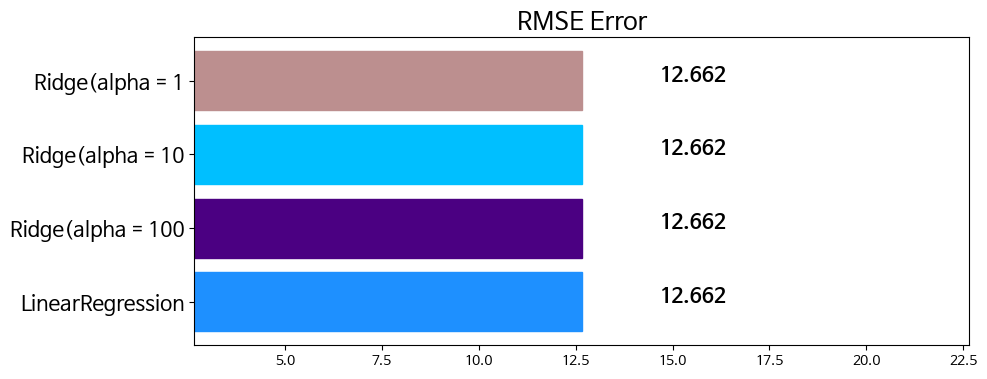

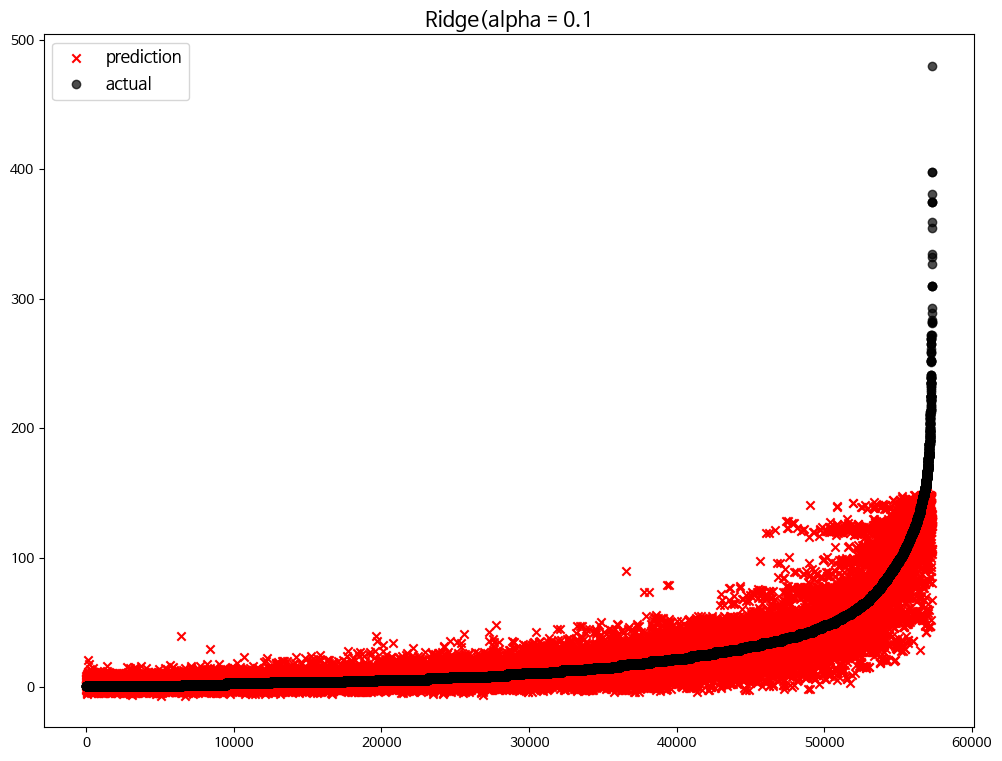

               model       rmse
0   LinearRegression  12.661563
1  Ridge(alpha = 100  12.661563
2   Ridge(alpha = 10  12.661563
3    Ridge(alpha = 1  12.661563
4  Ridge(alpha = 0.1  12.661563


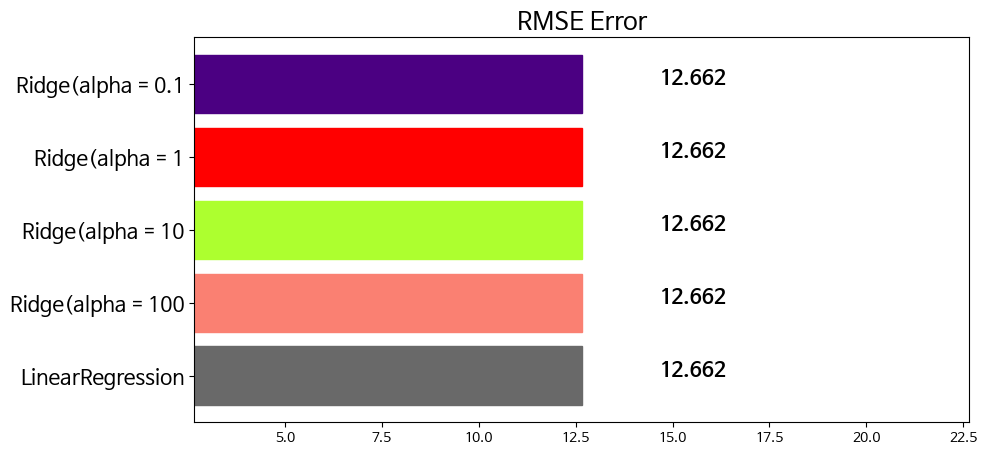

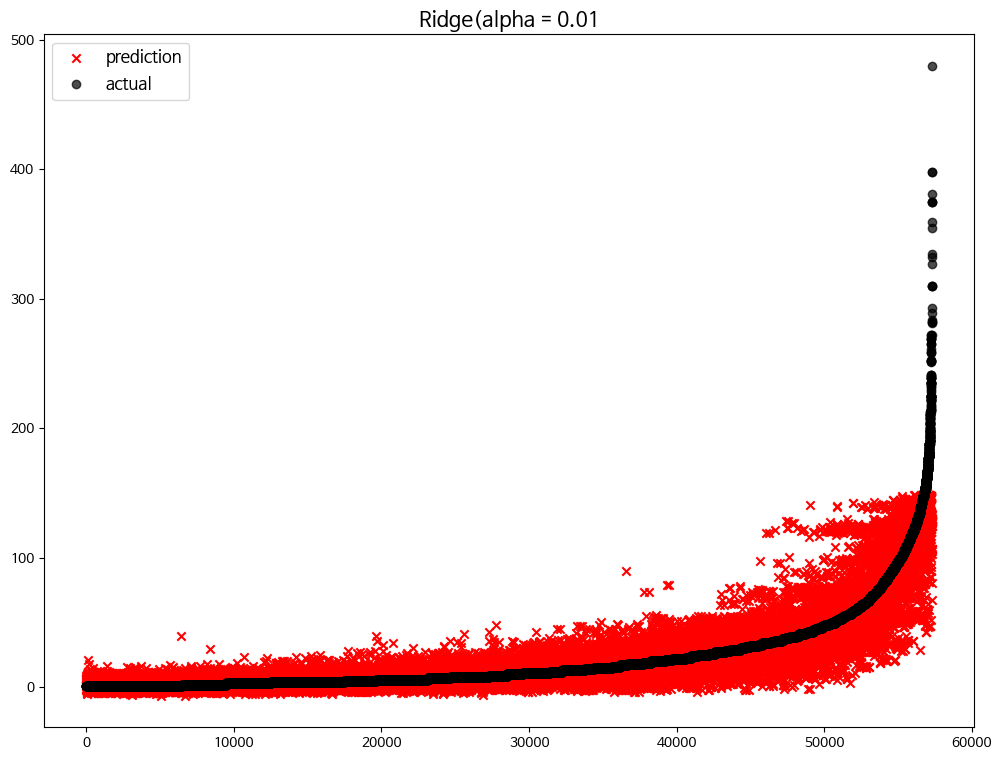

                model       rmse
0    LinearRegression  12.661563
1   Ridge(alpha = 100  12.661563
2    Ridge(alpha = 10  12.661563
3     Ridge(alpha = 1  12.661563
4   Ridge(alpha = 0.1  12.661563
5  Ridge(alpha = 0.01  12.661563


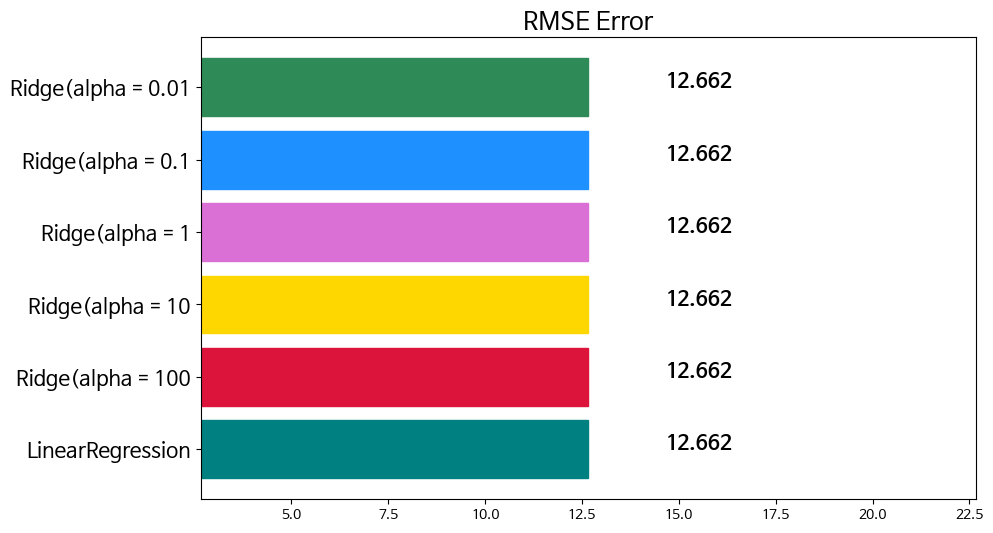

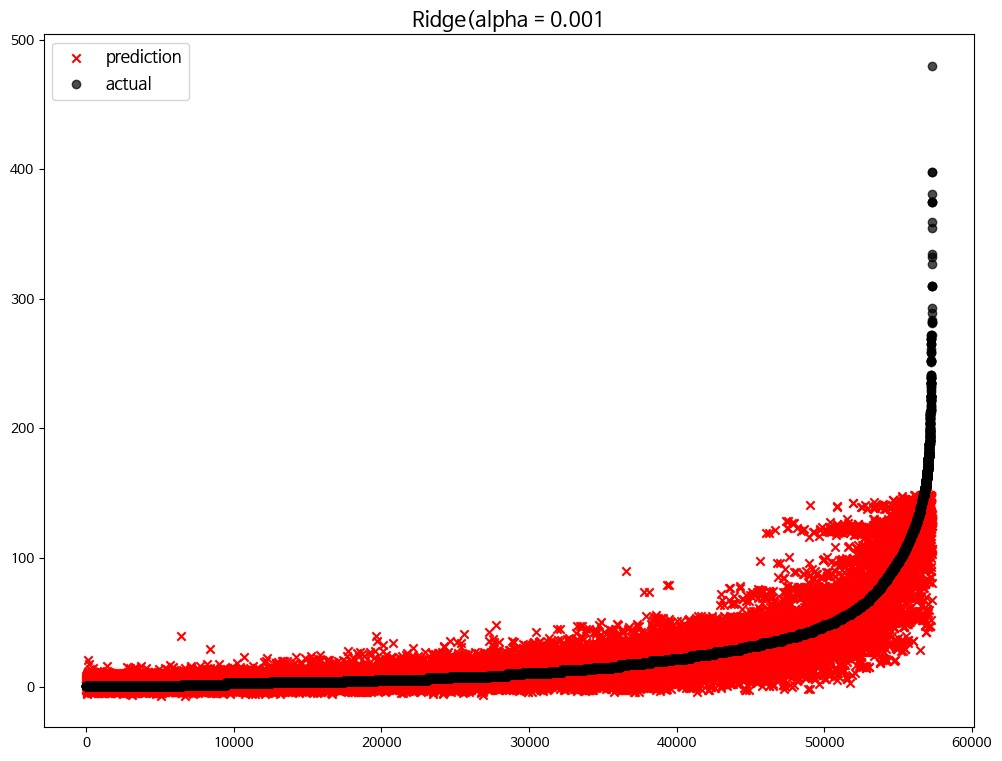

                 model       rmse
0     LinearRegression  12.661563
1    Ridge(alpha = 100  12.661563
2     Ridge(alpha = 10  12.661563
3      Ridge(alpha = 1  12.661563
4    Ridge(alpha = 0.1  12.661563
5   Ridge(alpha = 0.01  12.661563
6  Ridge(alpha = 0.001  12.661563


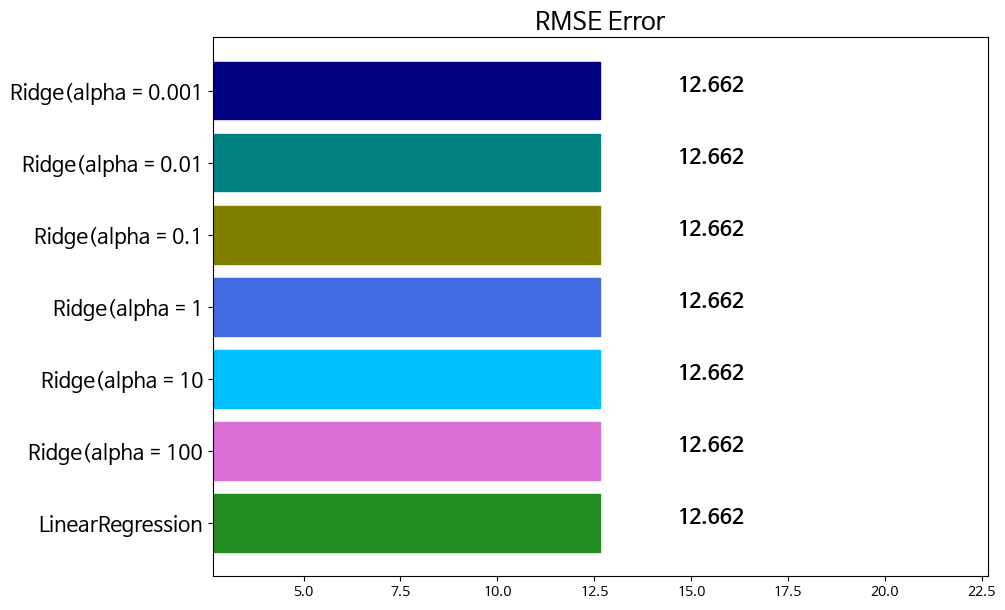

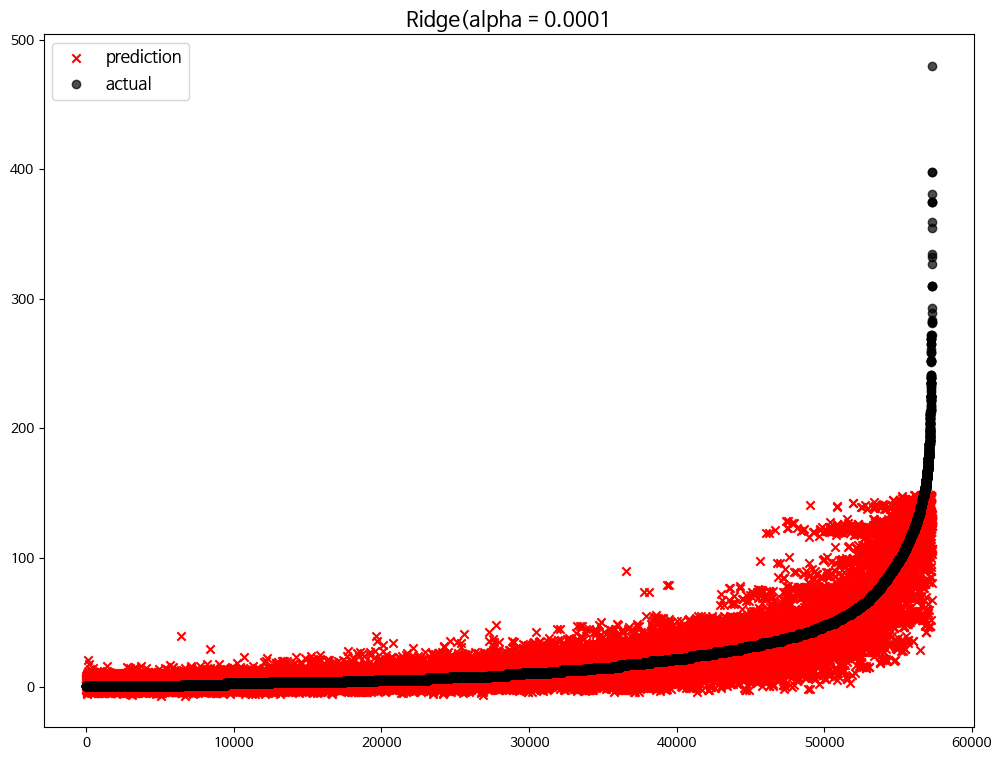

                  model       rmse
0      LinearRegression  12.661563
1     Ridge(alpha = 100  12.661563
2      Ridge(alpha = 10  12.661563
3       Ridge(alpha = 1  12.661563
4     Ridge(alpha = 0.1  12.661563
5    Ridge(alpha = 0.01  12.661563
6   Ridge(alpha = 0.001  12.661563
7  Ridge(alpha = 0.0001  12.661563


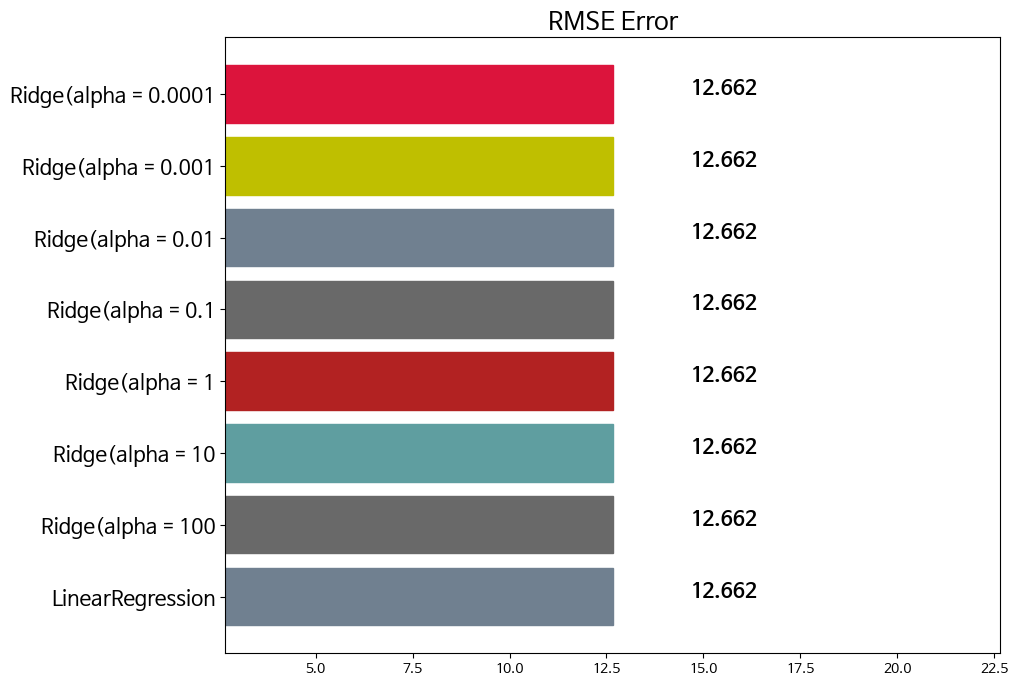

In [38]:
for alpha in alphas:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train,y_train)
  pred = ridge.predict(X_test)
  rmse_eval('Ridge(alpha = {}'.format(alpha),y_pred,y_test)

- 라쏘회귀

In [40]:
from sklearn.linear_model import Lasso

In [41]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001]

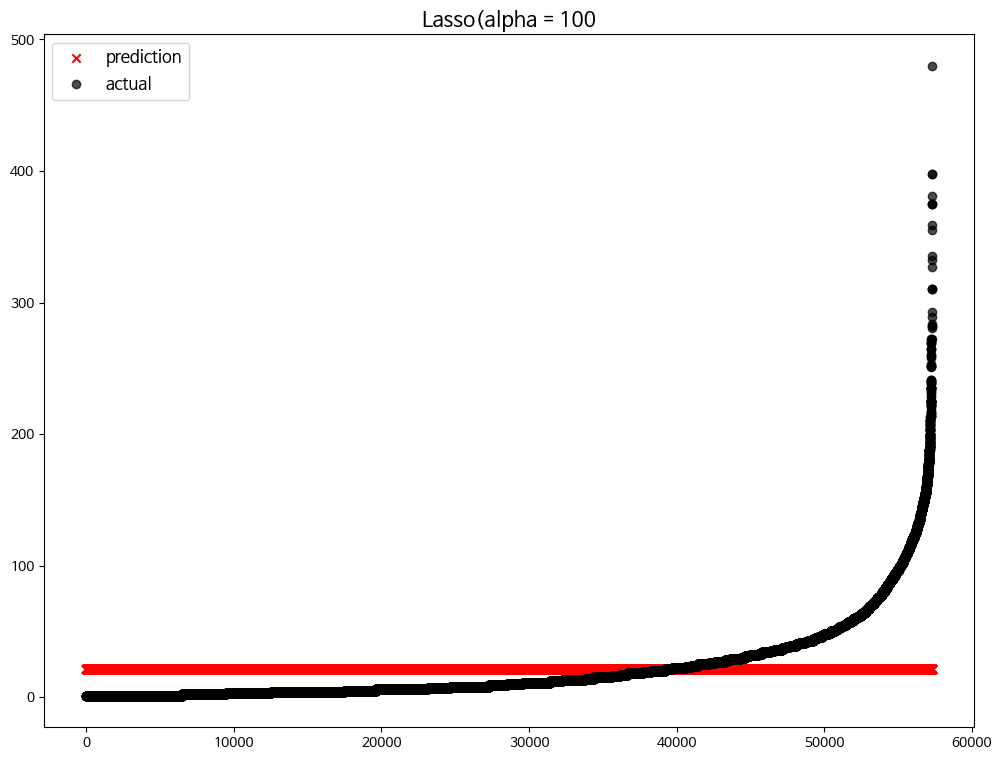

                  model       rmse
0     Lasso(alpha = 100  30.782883
1      LinearRegression  12.661563
2     Ridge(alpha = 100  12.661563
3      Ridge(alpha = 10  12.661563
4       Ridge(alpha = 1  12.661563
5     Ridge(alpha = 0.1  12.661563
6    Ridge(alpha = 0.01  12.661563
7   Ridge(alpha = 0.001  12.661563
8  Ridge(alpha = 0.0001  12.661563


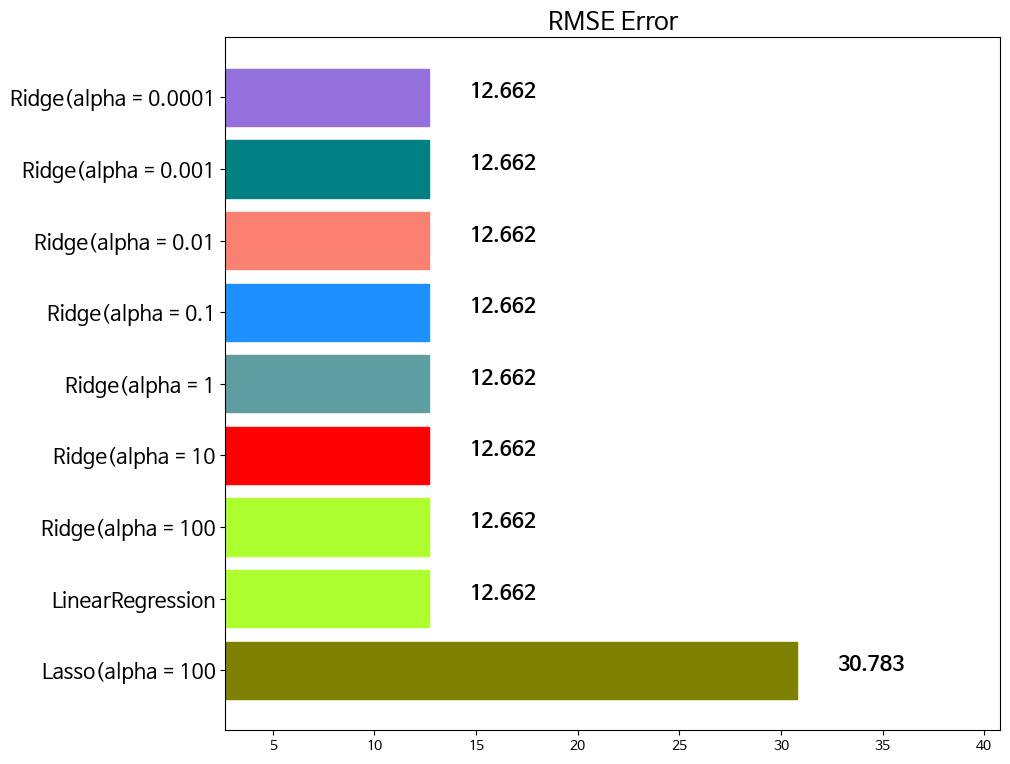

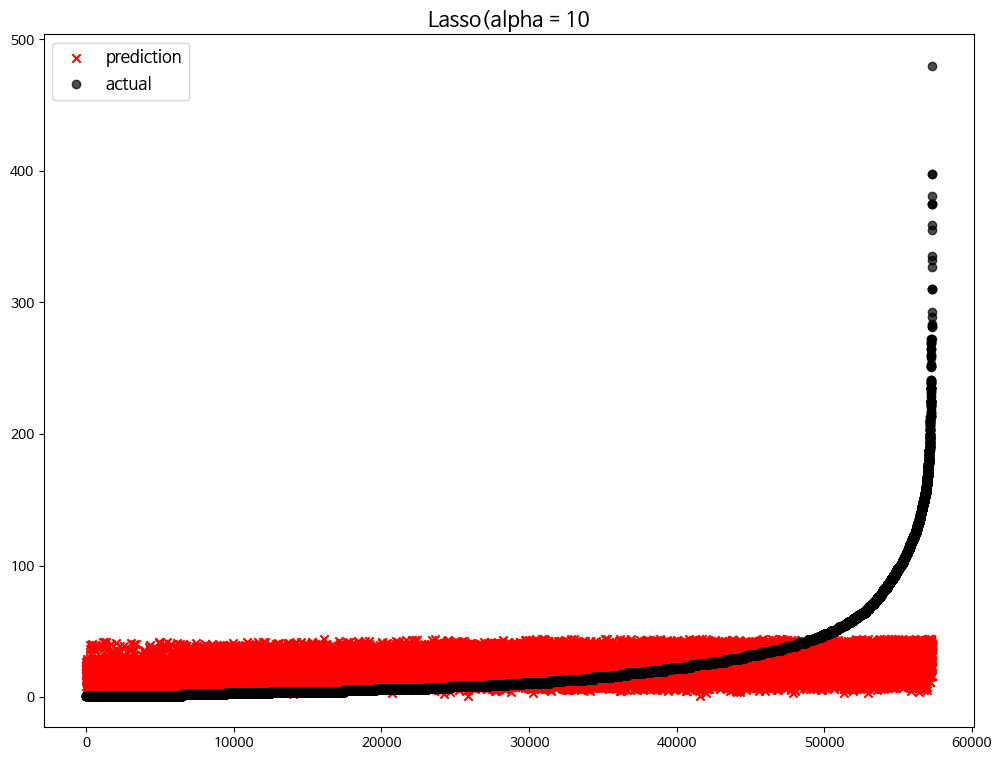

                  model       rmse
0     Lasso(alpha = 100  30.782883
1      Lasso(alpha = 10  28.743344
2      LinearRegression  12.661563
3     Ridge(alpha = 100  12.661563
4      Ridge(alpha = 10  12.661563
5       Ridge(alpha = 1  12.661563
6     Ridge(alpha = 0.1  12.661563
7    Ridge(alpha = 0.01  12.661563
8   Ridge(alpha = 0.001  12.661563
9  Ridge(alpha = 0.0001  12.661563


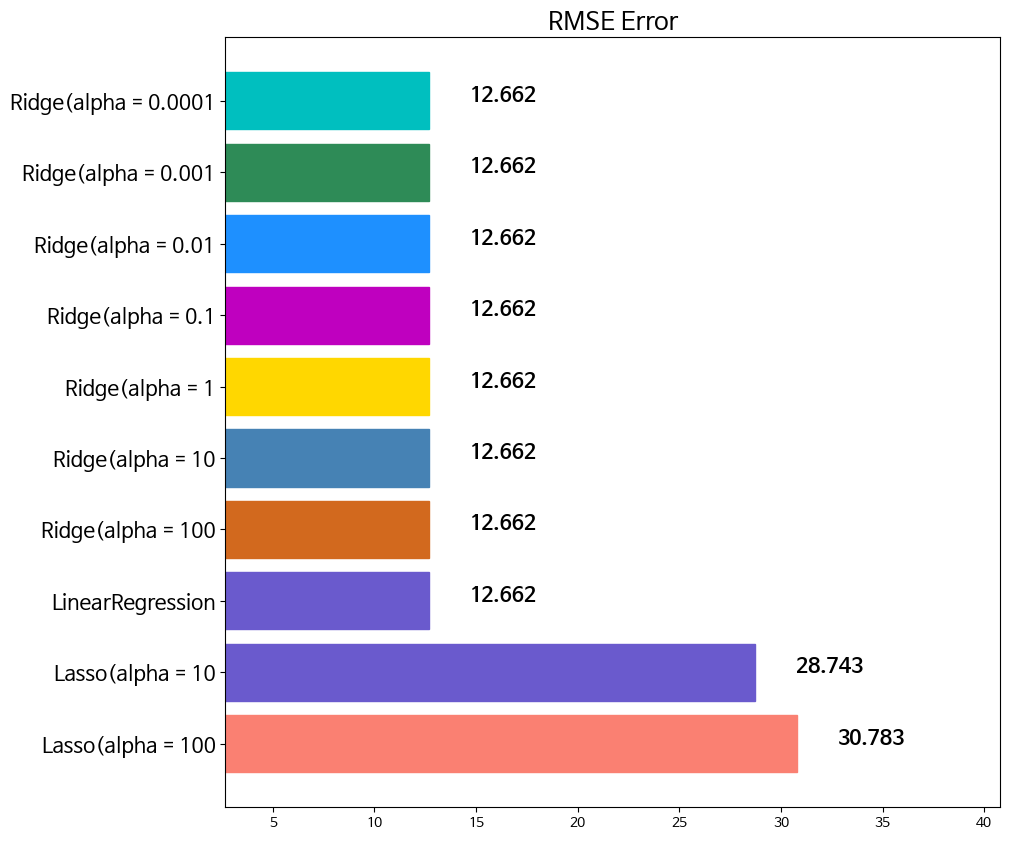

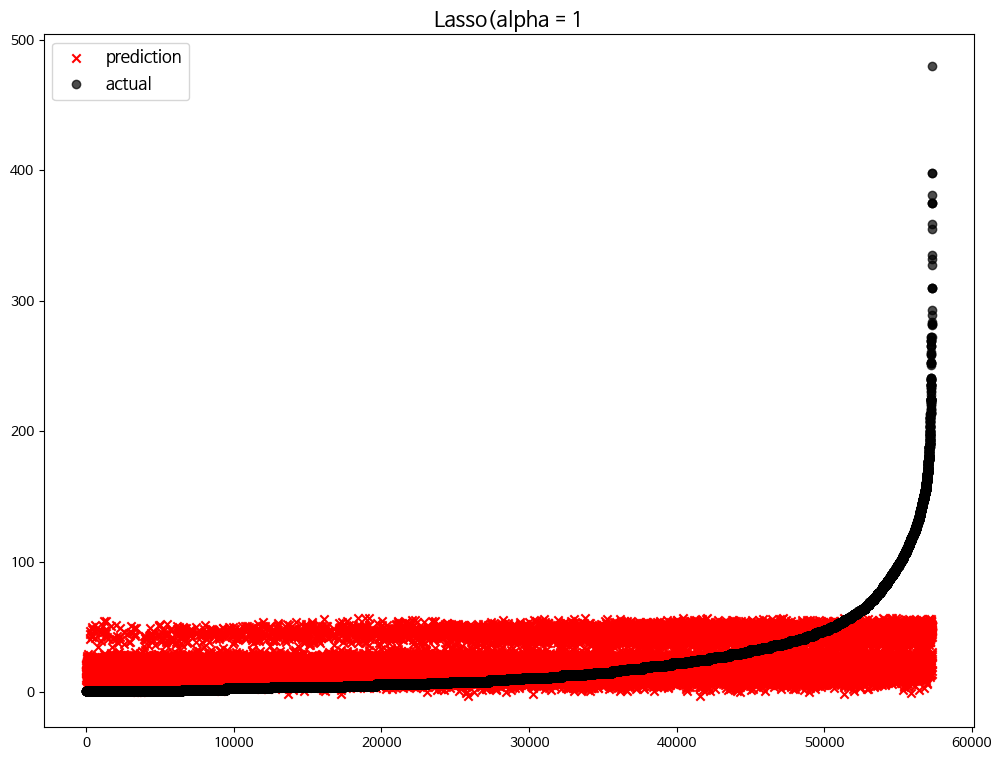

                   model       rmse
0      Lasso(alpha = 100  30.782883
1       Lasso(alpha = 10  28.743344
2        Lasso(alpha = 1  27.918113
3       LinearRegression  12.661563
4      Ridge(alpha = 100  12.661563
5       Ridge(alpha = 10  12.661563
6        Ridge(alpha = 1  12.661563
7      Ridge(alpha = 0.1  12.661563
8     Ridge(alpha = 0.01  12.661563
9    Ridge(alpha = 0.001  12.661563
10  Ridge(alpha = 0.0001  12.661563


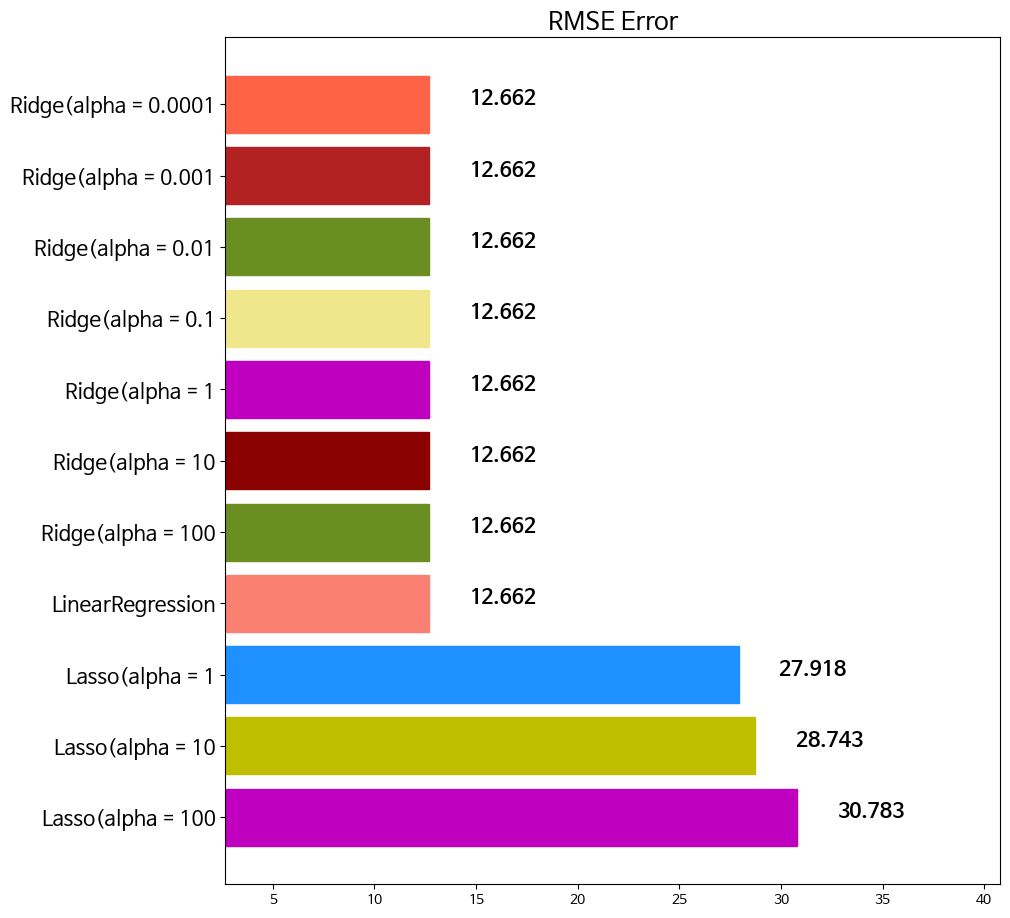

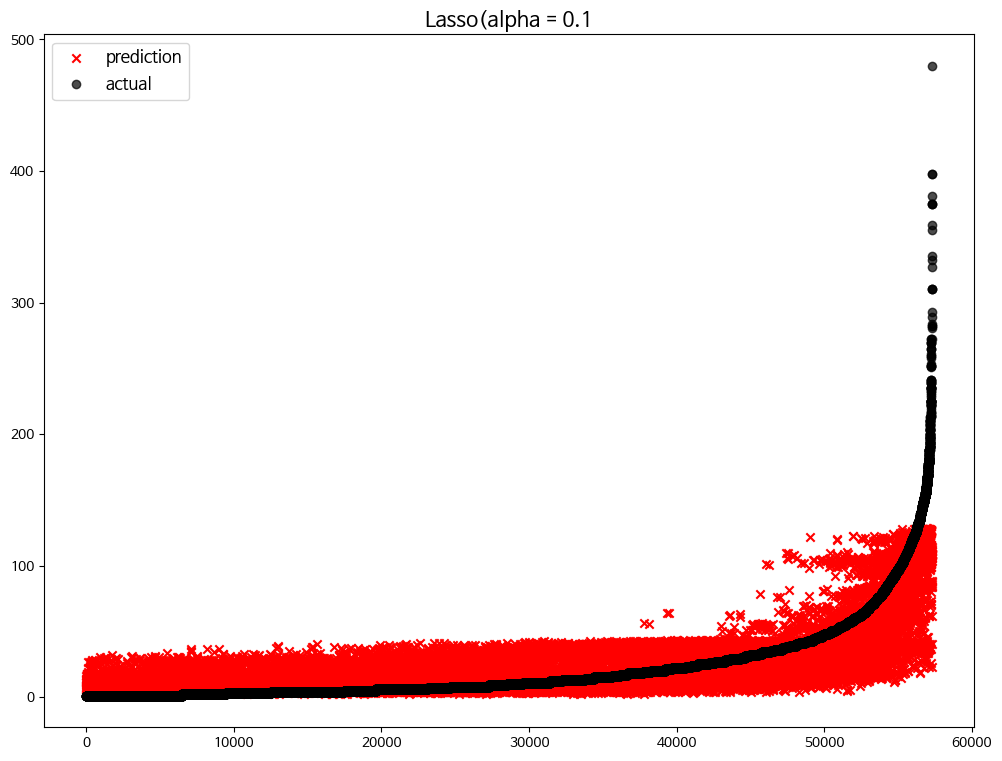

                   model       rmse
0      Lasso(alpha = 100  30.782883
1       Lasso(alpha = 10  28.743344
2        Lasso(alpha = 1  27.918113
3      Lasso(alpha = 0.1  17.083957
4       LinearRegression  12.661563
5      Ridge(alpha = 100  12.661563
6       Ridge(alpha = 10  12.661563
7        Ridge(alpha = 1  12.661563
8      Ridge(alpha = 0.1  12.661563
9     Ridge(alpha = 0.01  12.661563
10   Ridge(alpha = 0.001  12.661563
11  Ridge(alpha = 0.0001  12.661563


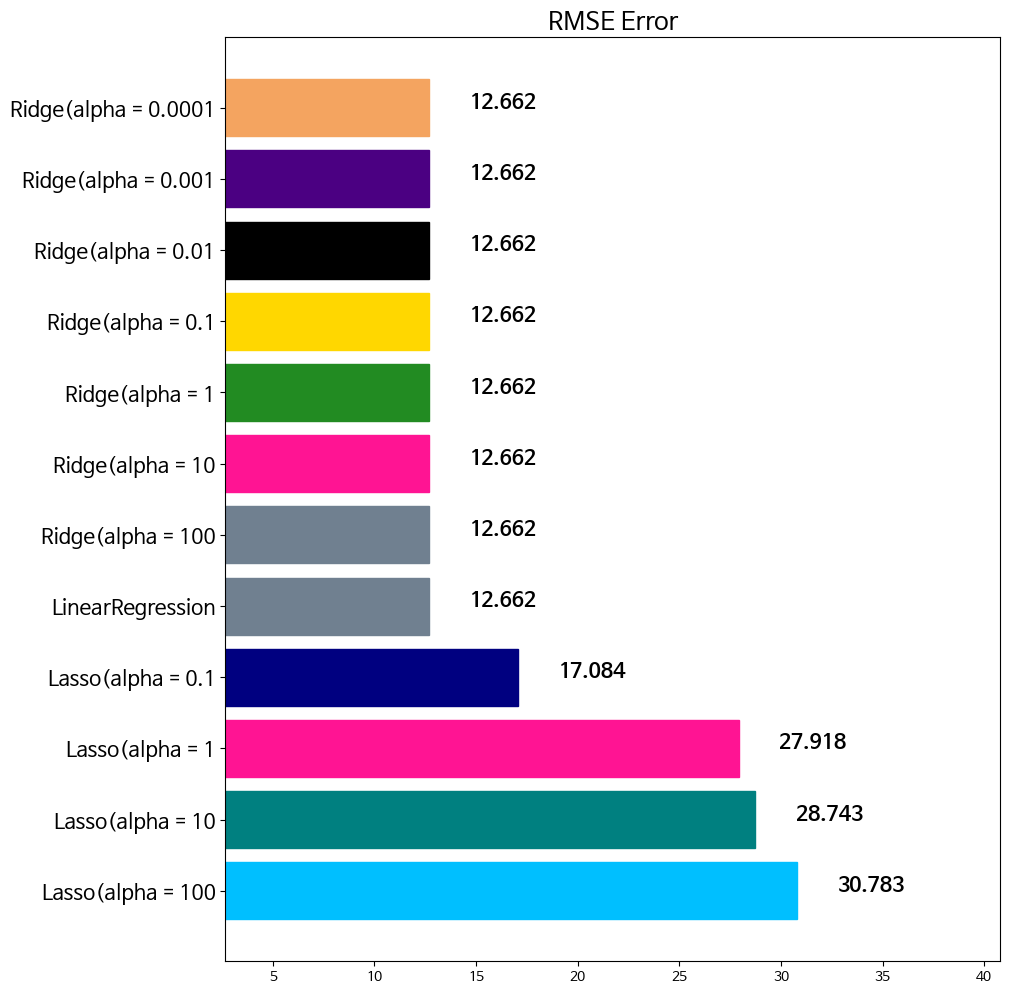

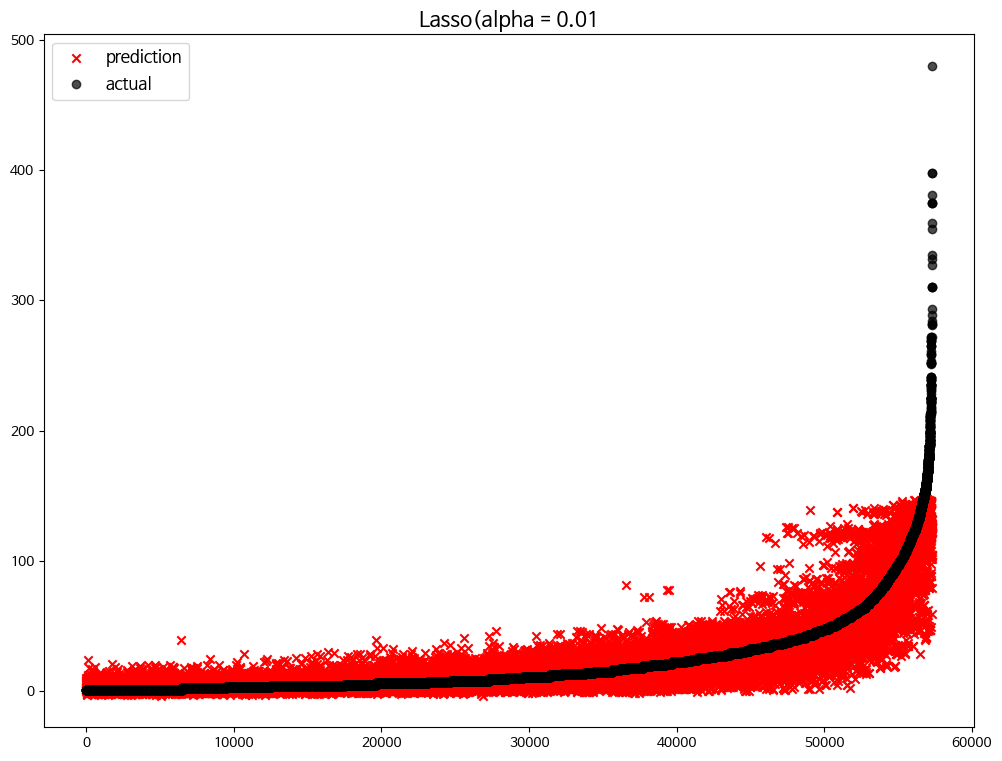

                   model       rmse
0      Lasso(alpha = 100  30.782883
1       Lasso(alpha = 10  28.743344
2        Lasso(alpha = 1  27.918113
3      Lasso(alpha = 0.1  17.083957
4     Lasso(alpha = 0.01  12.854490
5       LinearRegression  12.661563
6      Ridge(alpha = 100  12.661563
7       Ridge(alpha = 10  12.661563
8        Ridge(alpha = 1  12.661563
9      Ridge(alpha = 0.1  12.661563
10    Ridge(alpha = 0.01  12.661563
11   Ridge(alpha = 0.001  12.661563
12  Ridge(alpha = 0.0001  12.661563


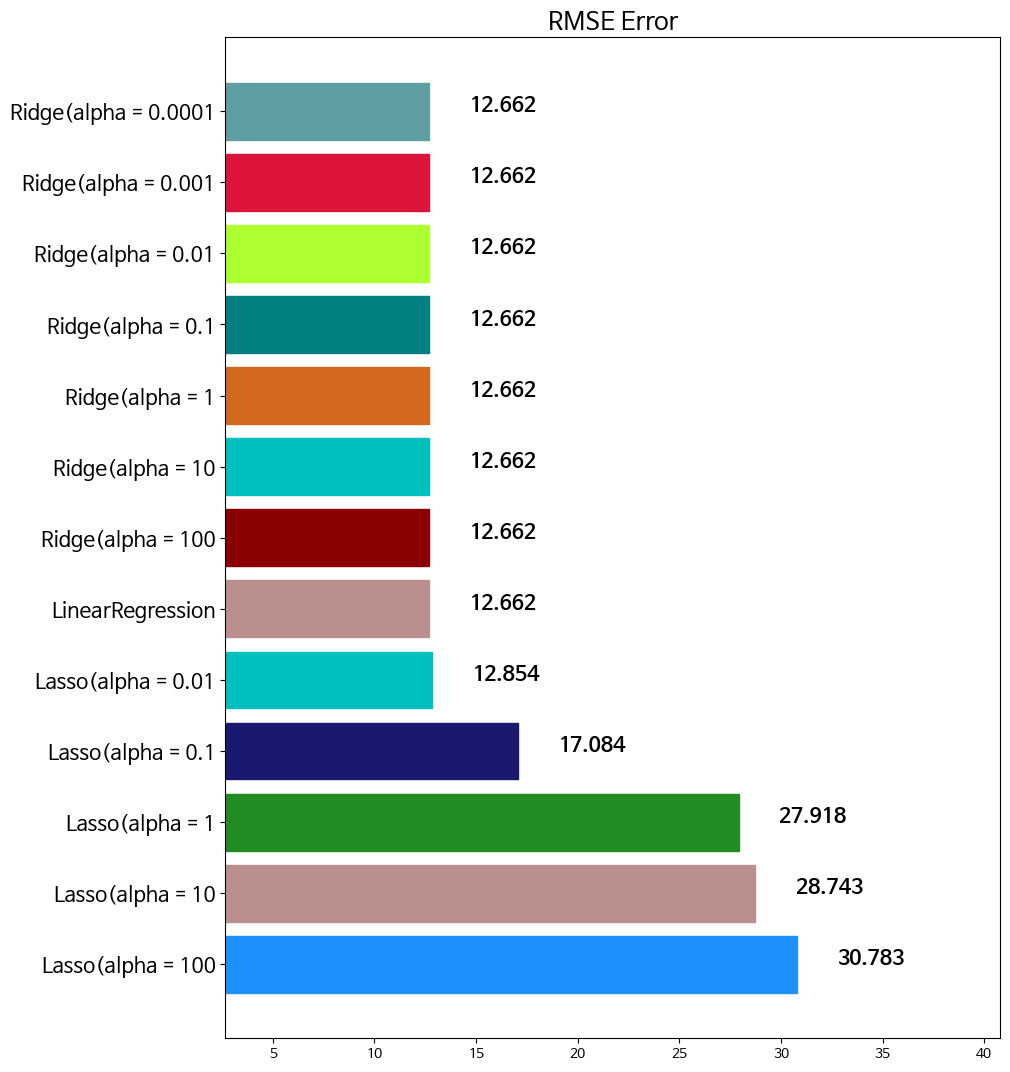

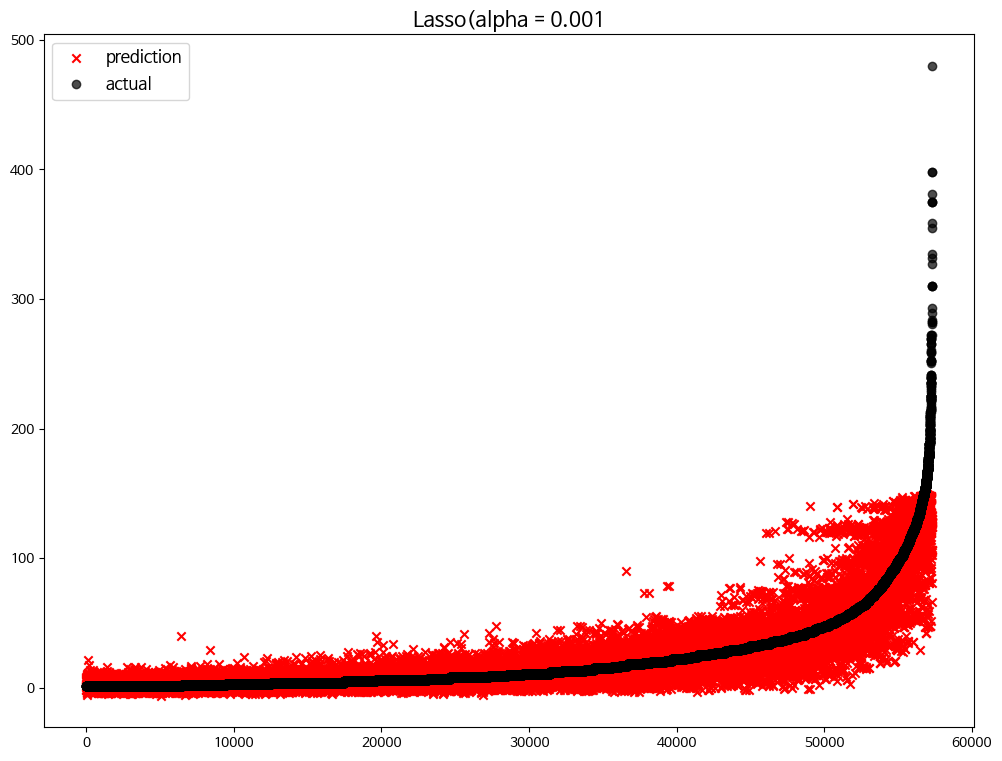

                   model       rmse
0      Lasso(alpha = 100  30.782883
1       Lasso(alpha = 10  28.743344
2        Lasso(alpha = 1  27.918113
3      Lasso(alpha = 0.1  17.083957
4     Lasso(alpha = 0.01  12.854490
5       LinearRegression  12.661563
6      Ridge(alpha = 100  12.661563
7       Ridge(alpha = 10  12.661563
8        Ridge(alpha = 1  12.661563
9      Ridge(alpha = 0.1  12.661563
10    Ridge(alpha = 0.01  12.661563
11   Ridge(alpha = 0.001  12.661563
12  Ridge(alpha = 0.0001  12.661563
13   Lasso(alpha = 0.001  12.658634


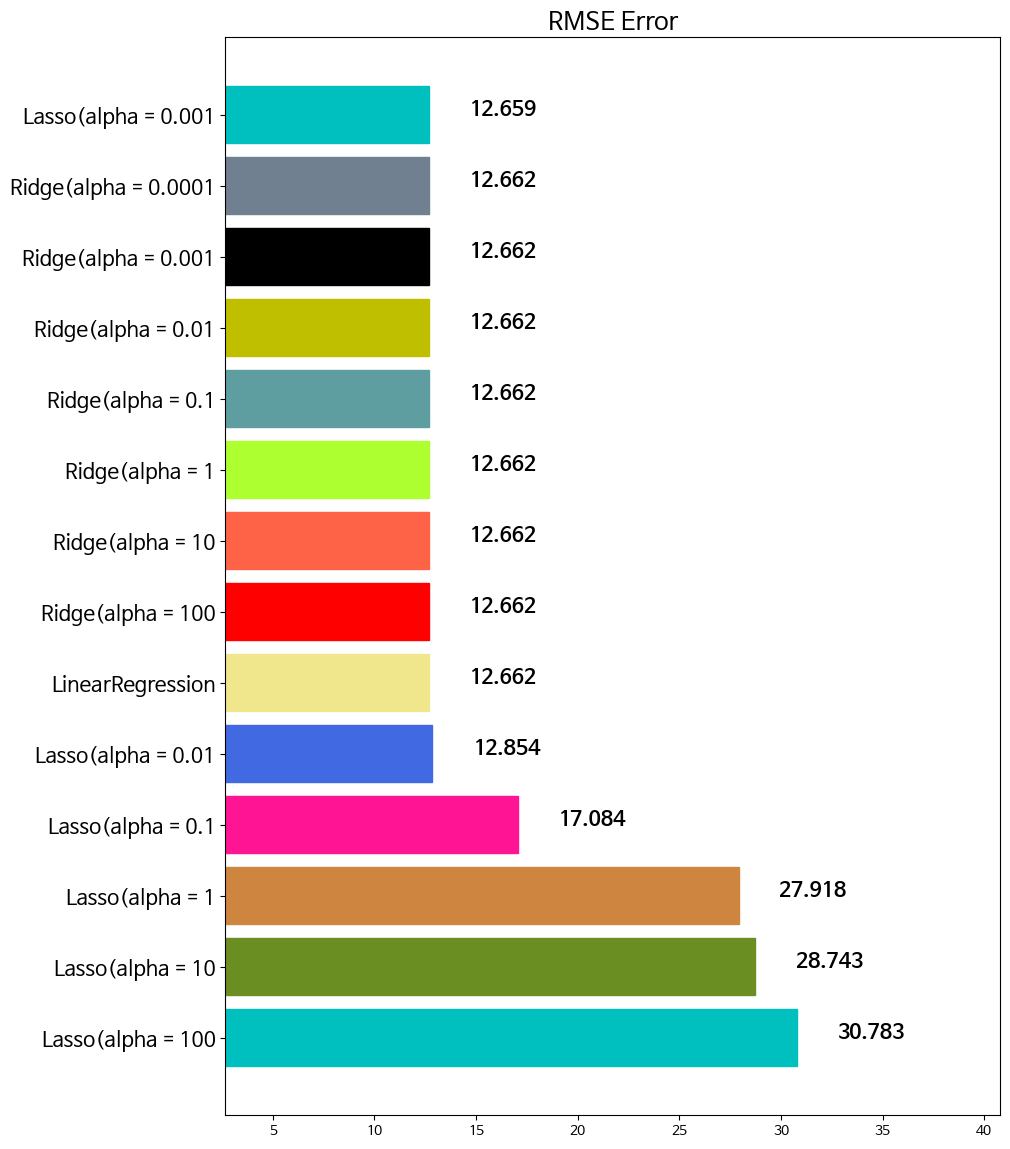

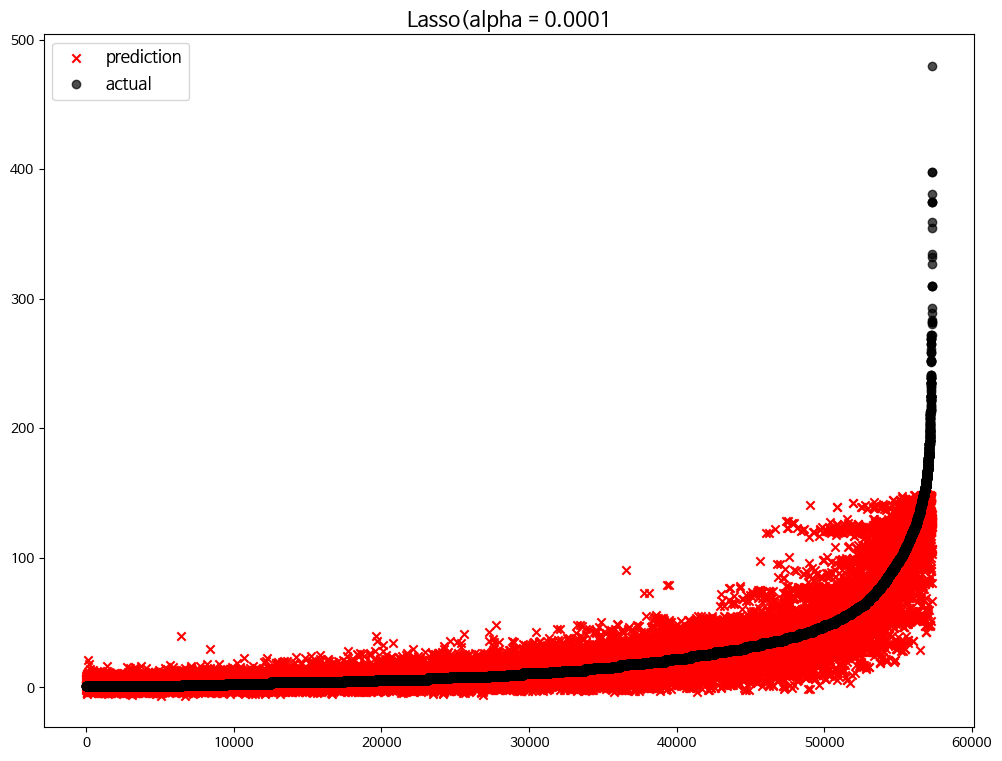

                   model       rmse
0      Lasso(alpha = 100  30.782883
1       Lasso(alpha = 10  28.743344
2        Lasso(alpha = 1  27.918113
3      Lasso(alpha = 0.1  17.083957
4     Lasso(alpha = 0.01  12.854490
5       LinearRegression  12.661563
6      Ridge(alpha = 100  12.661563
7       Ridge(alpha = 10  12.661563
8        Ridge(alpha = 1  12.661563
9      Ridge(alpha = 0.1  12.661563
10    Ridge(alpha = 0.01  12.661563
11   Ridge(alpha = 0.001  12.661563
12  Ridge(alpha = 0.0001  12.661563
13   Lasso(alpha = 0.001  12.658634
14  Lasso(alpha = 0.0001  12.655986


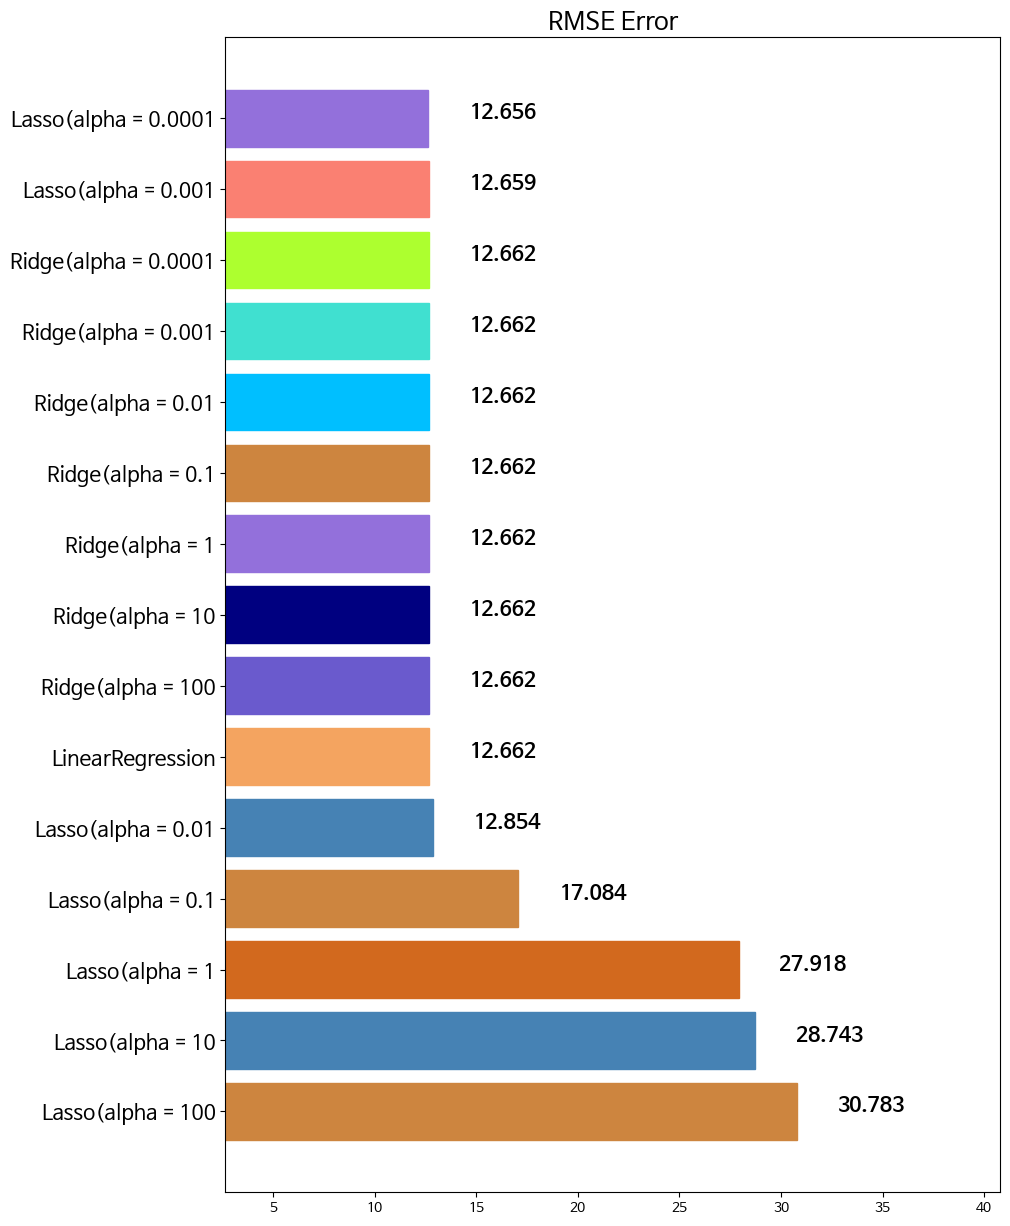

In [42]:
for alpha in alphas:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train,y_train)
  pred = lasso.predict(X_test)
  rmse_eval('Lasso(alpha = {}'.format(alpha),pred,y_test)

**엘라스틱**

In [43]:
from sklearn.linear_model import ElasticNet

In [44]:
ratios = [0.2,0.5,0.8]

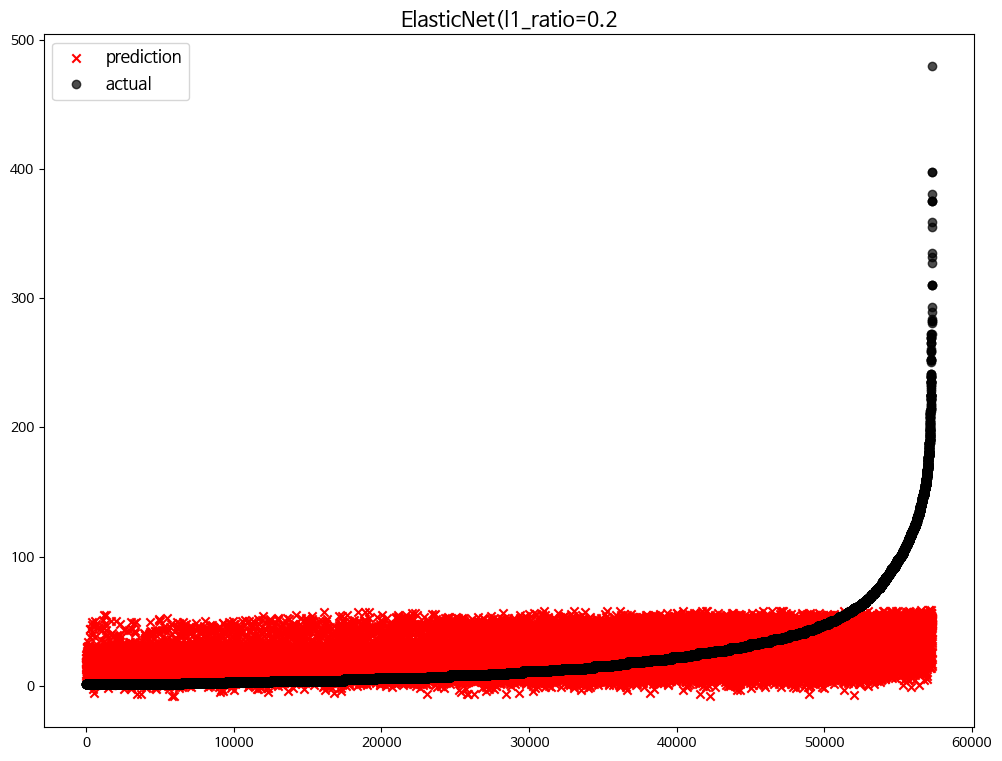

                      model       rmse
0         Lasso(alpha = 100  30.782883
1          Lasso(alpha = 10  28.743344
2           Lasso(alpha = 1  27.918113
3   ElasticNet(l1_ratio=0.2  27.863565
4         Lasso(alpha = 0.1  17.083957
5        Lasso(alpha = 0.01  12.854490
6          LinearRegression  12.661563
7         Ridge(alpha = 100  12.661563
8          Ridge(alpha = 10  12.661563
9           Ridge(alpha = 1  12.661563
10        Ridge(alpha = 0.1  12.661563
11       Ridge(alpha = 0.01  12.661563
12      Ridge(alpha = 0.001  12.661563
13     Ridge(alpha = 0.0001  12.661563
14      Lasso(alpha = 0.001  12.658634
15     Lasso(alpha = 0.0001  12.655986


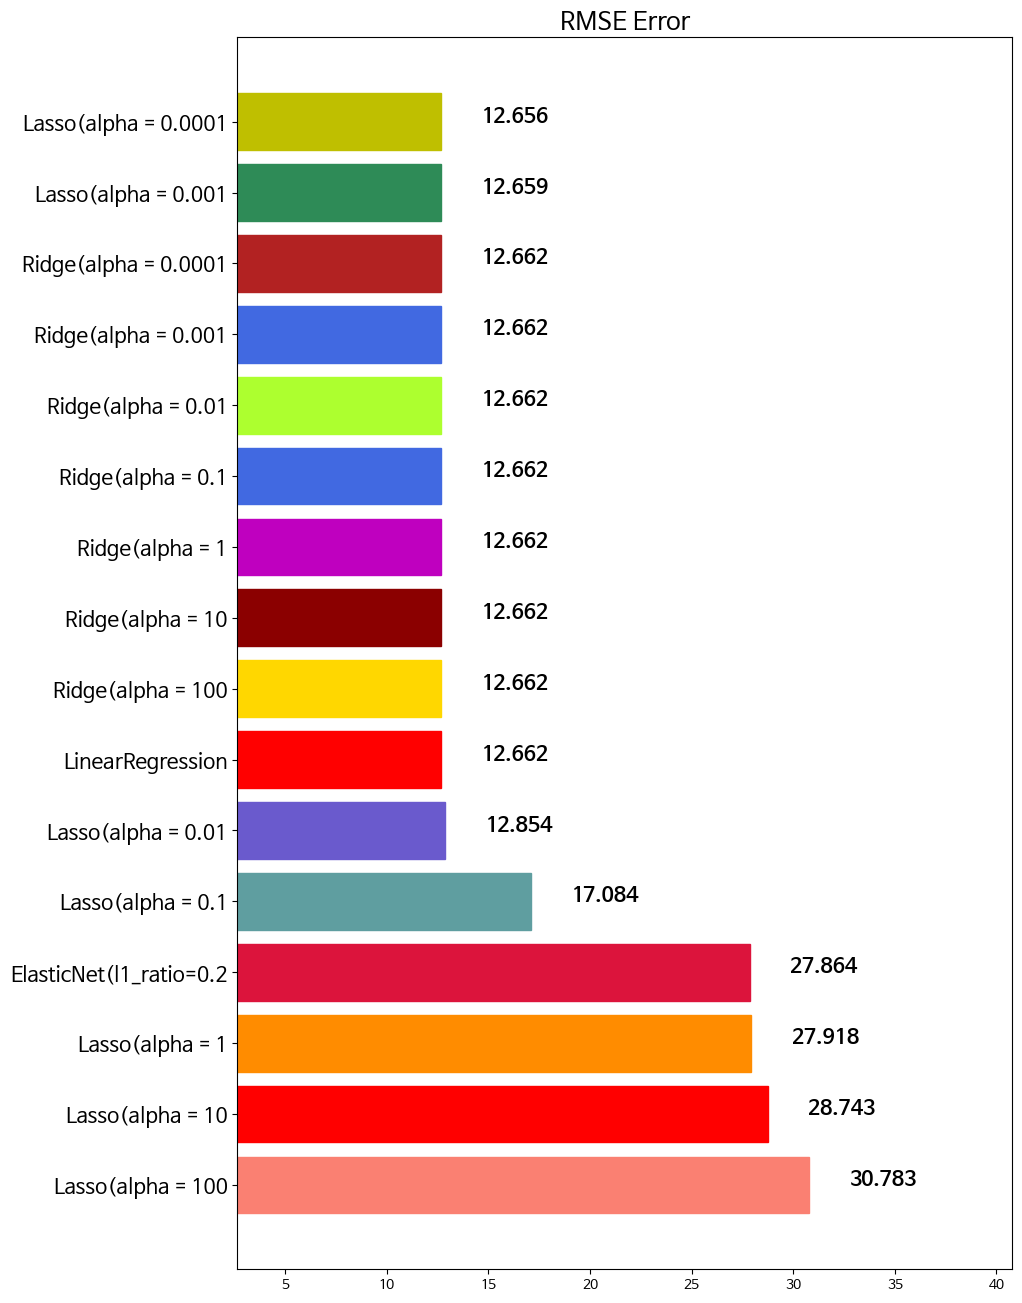

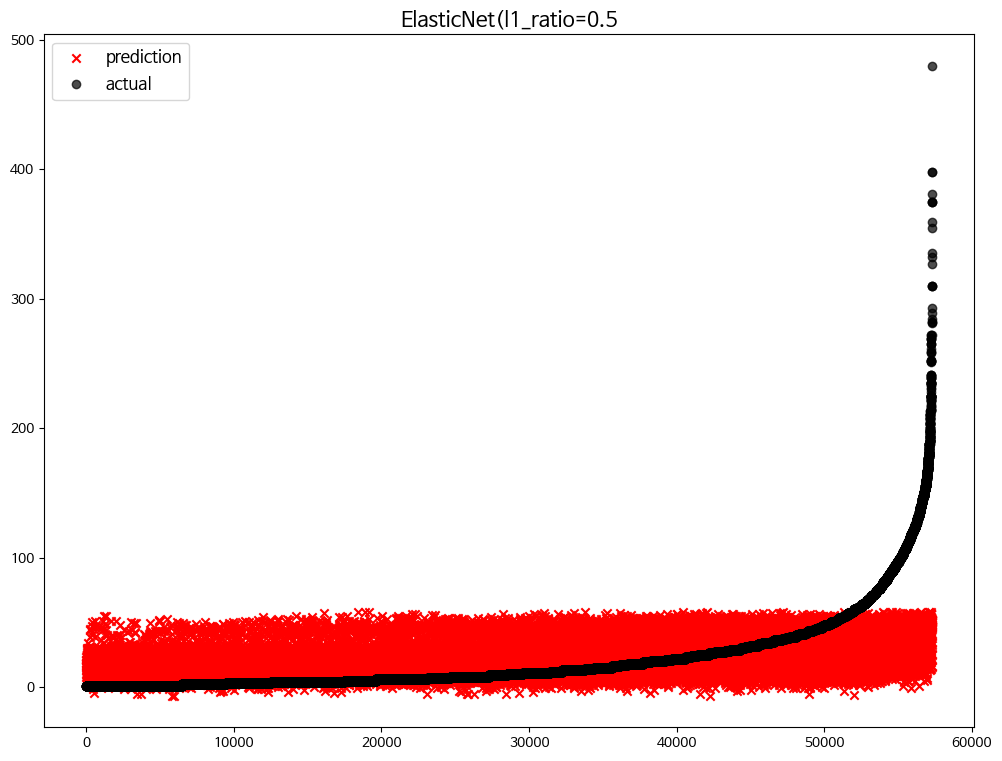

                      model       rmse
0         Lasso(alpha = 100  30.782883
1          Lasso(alpha = 10  28.743344
2           Lasso(alpha = 1  27.918113
3   ElasticNet(l1_ratio=0.2  27.863565
4   ElasticNet(l1_ratio=0.5  27.857559
5         Lasso(alpha = 0.1  17.083957
6        Lasso(alpha = 0.01  12.854490
7          LinearRegression  12.661563
8         Ridge(alpha = 100  12.661563
9          Ridge(alpha = 10  12.661563
10          Ridge(alpha = 1  12.661563
11        Ridge(alpha = 0.1  12.661563
12       Ridge(alpha = 0.01  12.661563
13      Ridge(alpha = 0.001  12.661563
14     Ridge(alpha = 0.0001  12.661563
15      Lasso(alpha = 0.001  12.658634
16     Lasso(alpha = 0.0001  12.655986


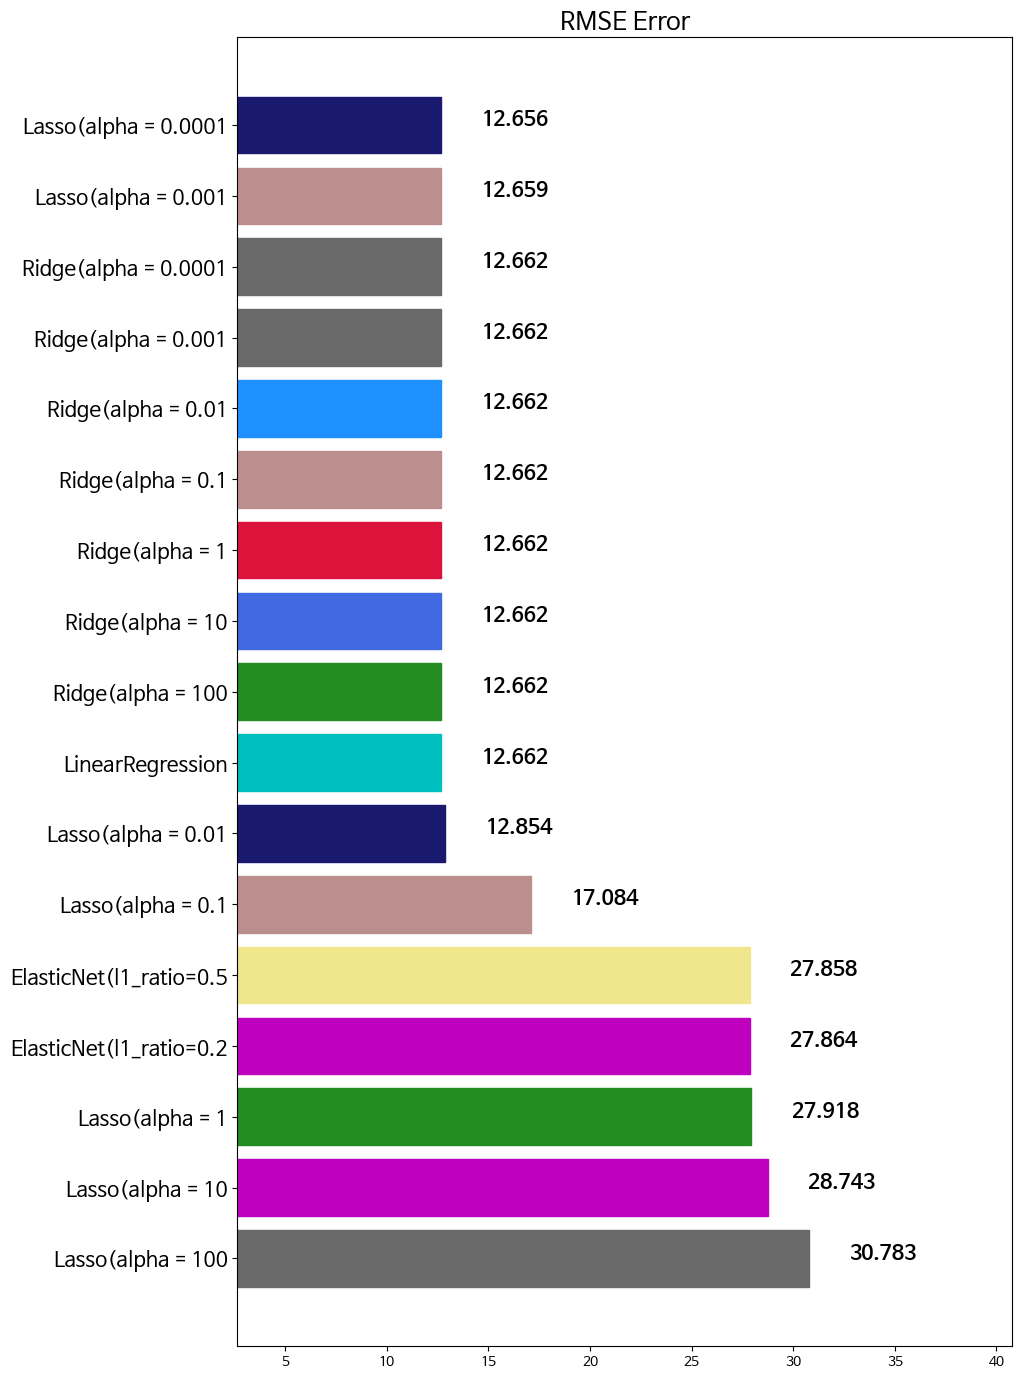

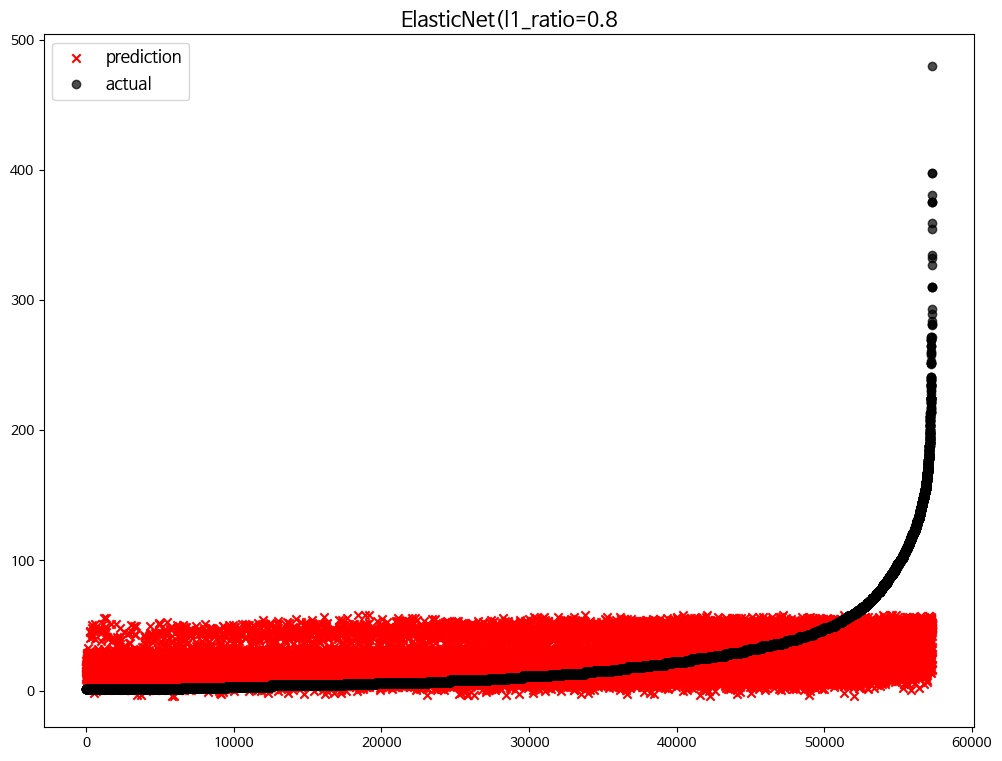

                      model       rmse
0         Lasso(alpha = 100  30.782883
1          Lasso(alpha = 10  28.743344
2           Lasso(alpha = 1  27.918113
3   ElasticNet(l1_ratio=0.2  27.863565
4   ElasticNet(l1_ratio=0.5  27.857559
5   ElasticNet(l1_ratio=0.8  27.771506
6         Lasso(alpha = 0.1  17.083957
7        Lasso(alpha = 0.01  12.854490
8          LinearRegression  12.661563
9         Ridge(alpha = 100  12.661563
10         Ridge(alpha = 10  12.661563
11          Ridge(alpha = 1  12.661563
12        Ridge(alpha = 0.1  12.661563
13       Ridge(alpha = 0.01  12.661563
14      Ridge(alpha = 0.001  12.661563
15     Ridge(alpha = 0.0001  12.661563
16      Lasso(alpha = 0.001  12.658634
17     Lasso(alpha = 0.0001  12.655986


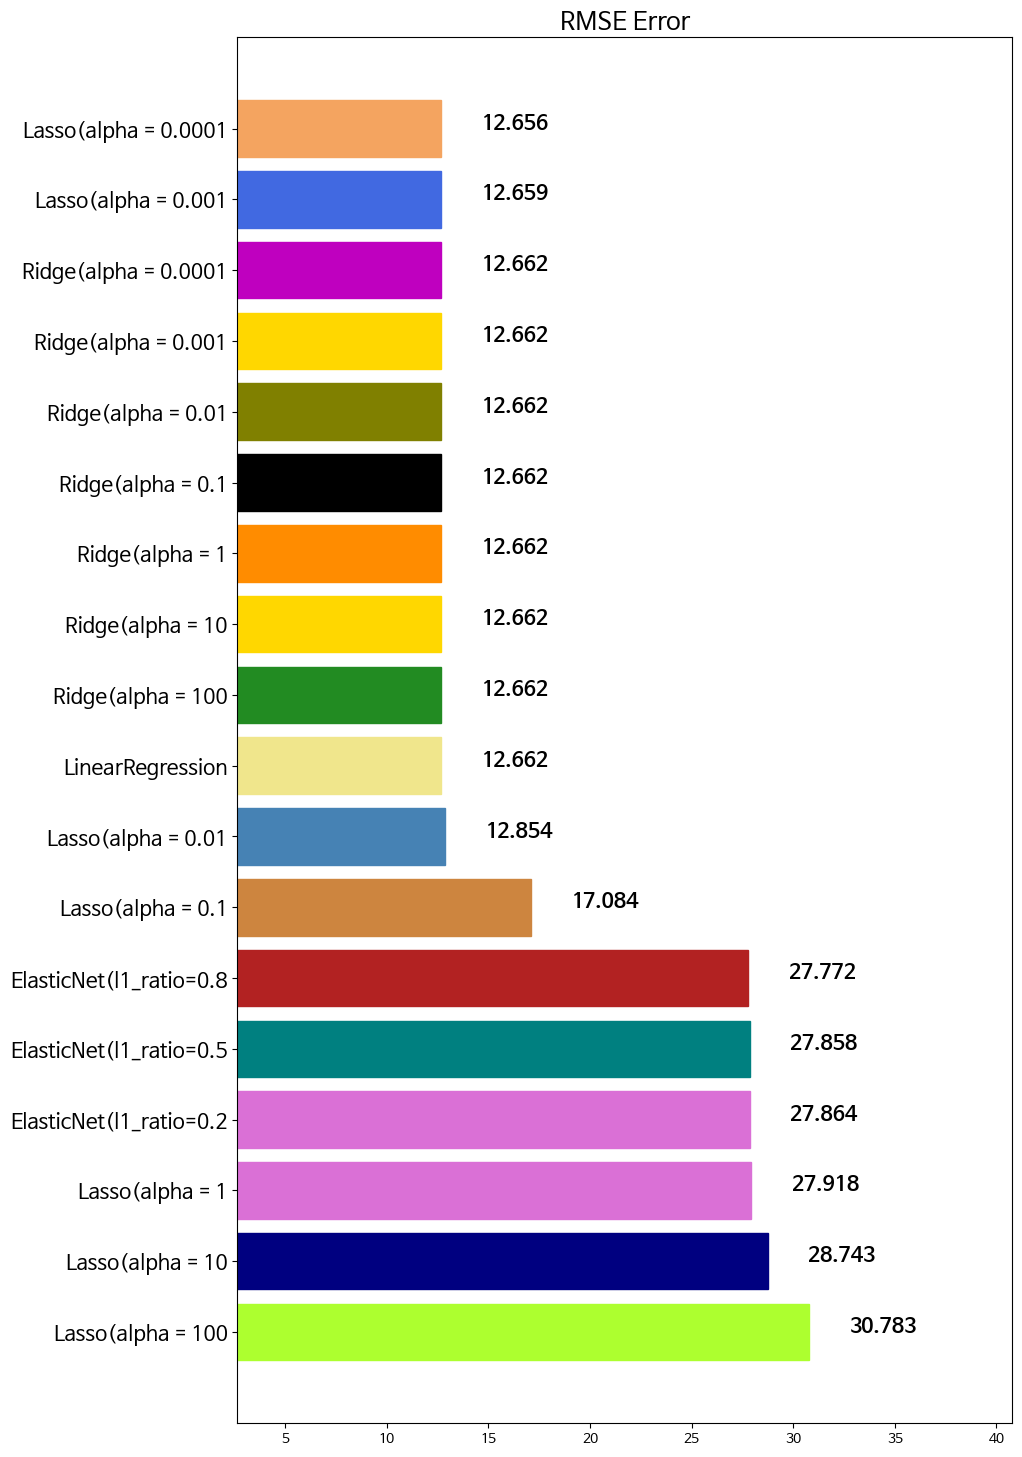

In [45]:
for ratio in ratios:
  elasticnet = ElasticNet(alpha = 0.5,l1_ratio = ratio)
  elasticnet.fit(X_train,y_train)
  pred = elasticnet.predict(X_test)
  rmse_eval('ElasticNet(l1_ratio={}'.format(ratio), pred, y_test)